## 기계학습 팀플 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import mglearn

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [2]:
dry_bean = pd.read_excel('Dry_Bean_Dataset.xlsx')

In [29]:
dry_bean

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [30]:
dry_bean['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [32]:
pd.get_dummies(dry_bean, columns = ['Class'],drop_first=True)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.007332,0.003147,0.834222,0.998724,0,0,0,0,1,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,...,0.006979,0.003564,0.909851,0.998430,0,0,0,0,1,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.007244,0.003048,0.825871,0.999066,0,0,0,0,1,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.007017,0.003215,0.861794,0.994199,0,0,0,0,1,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.006697,0.003665,0.941900,0.999166,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,...,0.006858,0.001749,0.642988,0.998385,0,0,1,0,0,0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,...,0.006688,0.001886,0.676099,0.998219,0,0,1,0,0,0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,...,0.006681,0.001888,0.676884,0.996767,0,0,1,0,0,0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,...,0.006724,0.001852,0.668237,0.995222,0,0,1,0,0,0


In [33]:
feature_columns = list(dry_bean.columns.difference(['Class']))
X = dry_bean[feature_columns]
Y = dry_bean['Class']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, train_size = 0.7, test_size = 0.3, random_state = 1234)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(9527, 16) (4084, 16) (9527,) (4084,)


In [36]:
import sklearn.preprocessing as preprocessing

In [37]:
'''
preprocessor = preprocessing.Normalizer()
X_train = preprocessor.fit_transform(X_train)
Y_test = preprocessor.transform(X_test)
'''

'\npreprocessor = preprocessing.Normalizer()\nX_train = preprocessor.fit_transform(X_train)\nY_test = preprocessor.transform(X_test)\n'

In [38]:
from sklearn.neighbors import KNeighborsClassifier
dry_bean_knn = KNeighborsClassifier(n_neighbors=1)
dry_bean_knn.fit(X_train, Y_train)
y_pred = dry_bean_knn.predict(X_test)
dry_bean_score = dry_bean_knn.score(X_test, Y_test)
dry_bean_score

In [45]:
from sklearn import neighbors

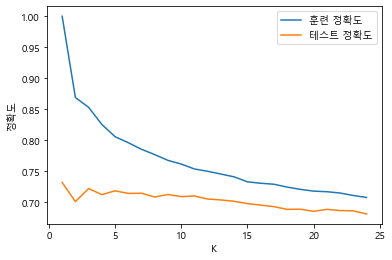

In [46]:
training_accuracy = []
test_accuracy = []
# 여러 k값에 대한 모델 생성 n_neighbors 를 적용
k_settings = range(1, 25)

for k in k_settings:
    # 모델 생성
    dry_bean_knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    dry_bean_knn.fit(X_train, Y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(dry_bean_knn.score(X_train, Y_train))
    # 일반화 정확도 저장
    test_accuracy.append(dry_bean_knn.score(X_test, Y_test))

# K의 변황량에 따른 예측정확도 성능 비교
plt.plot(k_settings, training_accuracy, label="훈련 정확도")
plt.plot(k_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("K")
plt.legend()

In [47]:
from itertools import compress
best_k_temp = test_accuracy == max(test_accuracy)
best_k = list(compress(k_settings, best_k_temp))[0]
print('최적의 k값', best_k)

최적의 k값 1
